<a href="https://colab.research.google.com/github/hhboorstein/number-theory/blob/main/nt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prime Projects

## Prime Number List

Calculates primes up to a user-defined bound. Checks each positive integer for prime divisibility, and appends the candidate if prime.

In [84]:
import numpy as np

def prime_list(bound):
  '''Make a list of prime numbers
  up to bound. Requires numpy package.'''
  primes=[]
  for i in range(2,bound+1):
    proceed=True
    for p in primes:
      if np.sqrt(i)<p:
        break
      if i%p==0:
        proceed=False
        break
      else:
        continue
    if proceed==True:
      primes.append(i)
  return primes

In [ ]:
print(prime_list(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


## Sieve of Eratosthenes

Another technique for calculating prime numbers up to a user-specified bound. The difference here is that all multiples of primes are sieved out at once, and what's left must be prime.

In [ ]:
def sieve(bound):
  '''Sieves out primes
  up to bound.'''
  bound +=1
  primes=range(2,bound) #this will only contain primes at the end
  for i in range(2,bound):
    if i**2>bound: #more optimized halting condition
      break
    if i in primes:
      mult_i=[i*j for j in range(i,(bound//i)+1)] #list of prime mults
      primes=[n for n in primes if n not in mult_i] #sieve out mult_i
  return primes

In [ ]:
print(sieve(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [ ]:
print(sieve(100)==prime_list(100))

True


In [ ]:
#which is faster?
import time

a=10000

t0=time.time()
prime_list(a)
t1=time.time()
print('prime_list takes',t1-t0,'seconds')

t2=time.time()
sieve(a)
t3=time.time()
print('sieve takes', t3-t2,'seconds')

prime_list takes 0.089752197265625 seconds
sieve takes 1.0314862728118896 seconds


It looks like the prime_list function is faster than the sieve approach. For primes up to 100,000, prime_list took one second and I interrupted sieve after a minute. Huge difference. There are surely ways to further optimize both.

## Twin Primes

Using the prime_list function, the following counts the number of twin prime pairs up to a bound and records the pairs as tuples. (Requires declaration of prime_list.)

In [ ]:
print("We will be finding the number of twin primes, \n i.e., primes that differ by 2, \n up to a given bound.")
b=int(input("Input bound: "))
primes=prime_list(b)
twins=[]
count=0
for i in range(len(primes)-1):
  if primes[i]+2==primes[i+1]:
    count+=1
    twins.append((primes[i],primes[i+1]))
print("There are", count, "pairs of twin primes up to", b)
print("The twin primes less than", b, "are:")
print(twins)

We will be finding the number of twin primes, 
 i.e., primes that differ by 2, 
 up to a given bound.
Input bound: 100
There are 8 pairs of twin primes up to 100
The twin primes less than 100 are:
[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73)]


## Primality Tests

Primality tests are probabilistic tests based in number theory. Such tests determine whether a given positive integer is *likely* to be prime. More precisely, an integer that passes a probable primality test has a property shared by all primes but not most composites. These tests are not guarantees, but the increased sophistication in modern techniques provides high probability of accuracy.

Included is also a deterministic test (labelled as such).

### Fermat

This test is based on Fermat's Little Theorem. While the test is old, the theorem is still the backbone of many modern tests.

In [1]:
import numpy as np

def fermat(n):
  '''Tests a positive integer
  n>3 for probable primality.'''
  if n <= 3 or n%2==0:
    raise Exception('test only valid for odd n>3')
  a=0
  while not gcd(a,n)==1: #finds random a coprime to n
    a=np.random.randint(1,n)
  test=pow(a,n-1,n)
  if test==1:
    print('{} is a probable prime with witness {}.'.format(n,a))
  else:
    print('{} is composite.'.format(n))

In [6]:
fermat(29)

29 is a probable prime with witness 9.


It is possible that a number could pass for a given witness, so it is recommended to repeat the test several times with different witnesses. What's worse, there exists infinitely many Carmichael numbers, composite numbers that pass the Fermat primality test for all witnesses. Again, this test is not a guarantee.

In [111]:
# 1105 is a Carmichael number
fermat(1105)

1105 is a probable prime with witness 271.


### Selfridge Heuristic

John Selfridge suggested the following: For an odd integer $p$ such that $p\equiv\pm2\text{ mod }5$, then $p$ is prime if $2^{p-1}\equiv 1\text{ mod }p$ and $f_{p+1}\equiv 0\text{ mod } p$, where $f_n$ is the $n^{th}$ Fibonacci number. The first condition comes from the Fermat test (see above). This result is entirely conjectural, but there has yet to be a counterexaple. See [here](https://en.wikipedia.org/wiki/Primality_test#Heuristic_tests) and [here](https://en.wikipedia.org/wiki/John_Selfridge#Selfridge's_conjecture_about_primality_testing) for more.

In [124]:
from numpy import gcd

def selfridge(n):
  '''Selfridge primality heuristic.'''
  if n < 3 or n%2==0:
    raise Exception('test only valid for odd n>1')
  if not (n%5==2 or n%5==3):
    raise Exception('not cong 2,3 mod 5')
  if not pow(2,n-1,n)==1:
    return False
  if fd_fib(n+1)%n==0: 
    print("It's possible...")
    return True
  else:
    return False

In [122]:
selfridge(37)

It's possible...


True

In [123]:
selfridge(1567)

It's possible...


True

### Miller-Rabin

[See here for more.](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test)

In [5]:
import numpy as np

def mr_test(n):
  '''Miller-Rabin test for
  probable primality.'''
  if n<=2 or n%2==0:
    raise Exception('test only valid for odd n>2')
  # write n=(2**s)*d+1
  b=n-1; s=0
  while b%2==0:
    b=b//2
    s+=1
  d=b
  a=np.random.randint(1,n)
  test=pow(a,d,n)
  if test==1 or test==(n-1):
    print('{} is a probable prime with witness {}.'.format(n,a))
    return
  for r in range(1,s): # r=0 case above
    if pow(a,(2**r)*d,n)==(n-1):
      print('{} is a probable prime with witness {}.'.format(n,a))
      return
  print('{} is composite.'.format(n))

Note, these test still do fail. 323=17*19, but it passes the test occasionally; see below. 

In [ ]:
i=0
while i<10:
  mr_test(323)
  i+=1

323 is composite.
323 is a probable prime with witness 1.
323 is composite.
323 is composite.
323 is composite.
323 is composite.
323 is composite.
323 is composite.
323 is composite.
323 is composite.


This is why it is important to run a test several times with different bases. With the Miller-Rabin test, a composite number cannot produce a false positive to all bases simultaneously (unlike Carmichael numbers with the Fermat test), but testing all bases would be computationally taxing. There are several snazzy improvements to cut down on computation time and make the test deterministic.

### Deterministic Miller-Rabin

A speed enhancement in this test relies on the truth of (part of) the Generalized Riemann Hypothesis.

In [18]:
import numpy as np

def det_mr_test(n):
  '''Deterministic Miller-Rabin
  primality test.'''
  if n<=2 or n%2==0:
    raise Exception('test only valid for odd n>2')
  b=n-1; s=0
  while b%2==0:
    b=b//2
    s+=1
  d=b
  for a in range(2,min(n-2,int(2*(np.log(n)**2)))+1):
    x=pow(a,d,n)
    if x==1 or x==(n-1):
      continue
    flag=False
    for r in range(1,s):
      if pow(a,(2**r)*d,n)==(n-1):
        flag=True
        break
    if flag==False:
      print('{} is composite.'.format(n))
      return
  print('{} is prime.'.format(n))
      


In [7]:
det_mr_test(3517)

3517 is prime.


In [8]:
# 1105 is a Carmichael number
det_mr_test(1105)

1105 is composite.


# Collatz

The Collatz conjecture is an open problem in number theory that is simple to state. For a positive integer $n$, we consider the following function: $f(n)=n/2$ if $n$ is even, otherwise $f(n)=3n+1$.

It seems that after sufficiently many steps, any positive integer will reach $1$. It is unknown whether this is indeed true for all positive integers. While [experimental evidence](https://en.wikipedia.org/wiki/Collatz_conjecture#Experimental_evidence) shows that all *reasonable* numbers do reach $1$, a max_step halting condition is included for completeness and the practicalities of limited computing resources.

In [1]:
def collatz(n,max_step):
  '''
  Runs the Collatz function
  on n; returns number of steps to 1.
  Will time out after max_step.
  '''
  #Hardcode n=0 case so it doesn't
  #have to loop max_step times to get step=0
  if n==0:
    return 0
  #general logic
  step=0
  while n!=1:
    #timeout condition
    if step>max_step:
      return 0
    #collatz function
    if n%2==0:
      n=n//2
    else:
      n=3*n+1
    step+=1
  return step

This will graph the number of steps it takes 
 for integers to complete the Collatz procedure.
Calculate for integers up to: 100000
Upper bound of computation for each integer: 400


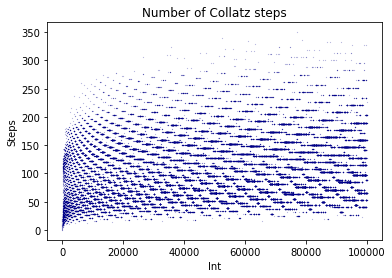

In [2]:
import numpy as np
import pandas as pd

print("This will graph the number of steps it takes \n for integers to complete the Collatz procedure.")
bound=int(input("Calculate for integers up to: "))
u=int(input("Upper bound of computation for each integer: "))

#Create step list
step_list=[collatz(n,u) for n in range(bound+1)]

#generate dataframe
#two columns: integers, steps
df=pd.DataFrame([[i,step_list[i]] for i in range(bound+1)],columns=['Int','Steps'])

#dotsize helps with graph readability
dotsize=1000/bound

#plot data
col=df.plot.scatter('Int','Steps',s=dotsize,c='DarkBlue',title='Number of Collatz steps')

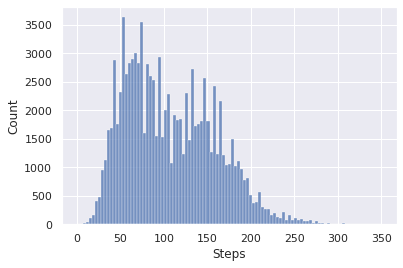

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.histplot(data=df['Steps'])
plt.show()

In [7]:
df.describe()

,Int,Steps
count,100001.000000,100001.000000
mean,50000.000000,107.537325
std,28867.946472,51.366787
min,0.000000,0.000000
25%,25000.000000,65.000000
50%,50000.000000,99.000000
75%,75000.000000,146.000000
max,100000.000000,350.000000


In [14]:
df.mode()['Steps'][0]

71.0

In [17]:
df['Parity']=['even' if i%2==0 else 'odd' for i in range(bound+1)]
df.head()

,Int,Steps,Parity
0,0,0,even
1,1,0,odd
2,2,1,even
3,3,7,odd
4,4,2,even


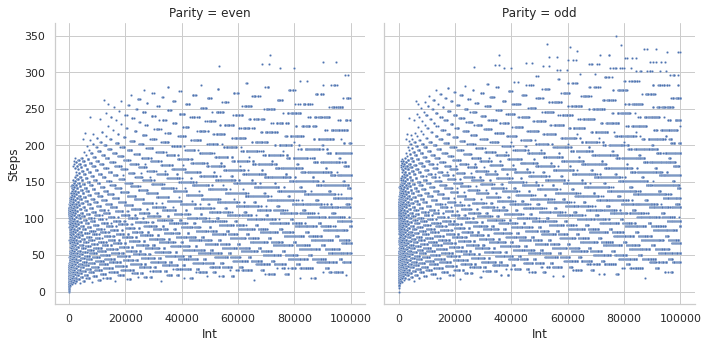

In [29]:
sns.set_style("whitegrid")
sns.relplot(data=df,x='Int',y='Steps',col='Parity',s=5, kind='scatter')

# Modular Mathematics

First, a function that uses the Euclidean algorithm to calculate GCD. This function prints each division step too.

In [ ]:
def egcd_w_print(a,b):
  '''Computes GCD(a,b) using the Euclidean algorithm.
  Prints formatted division steps.'''
  r=max(a,b)%min(a,b)
  c=min(a,b)
  if r==0:
    print('GCD({},{})={}'.format(a,b,c))
    return
  print('{}={}({})+{}'.format(max(a,b),max(a,b)//c,c,r))
  while c%r != 0:
    d=c
    s=r
    r=c%r
    c=s
    print('{}={}({})+{}'.format(d,d//s,s,r))
  print('GCD({},{})={}'.format(a,b,r))


In [ ]:
egcd_w_print(133,85)

133=1(85)+48
85=1(48)+37
48=1(37)+11
37=3(11)+4
11=2(4)+3
4=1(3)+1
GCD(133,85)=1


In [ ]:
egcd_w_print(91,49)

91=1(49)+42
49=1(42)+7
GCD(91,49)=7


In [ ]:
egcd_w_print(121,11)

GCD(121,11)=11


Next, the same function without all the extra printing.

In [3]:
def gcd(a,b):
  '''Computes GCD(a,b) using the Euclidean algorithm.'''
  if a==0:
    return b
  if b==0:
    return a
  c=min(a,b)
  r=max(a,b)%c
  if r==0:
    return c
  while c%r != 0: #while remainder is nonzero
    s=r
    r=c%r
    c=s
  return r

In [ ]:
print(gcd(171,57),gcd(2,2),gcd(11,121),gcd(91,49))

57 2 11 7


# RSA Encryption

Named for the first researchers to publish the method (Rivest, Shamir, Adleman), RSA is an asymmetric encryption method based on a simple number theoretic result: for $p,q$ large primes, it is computationally difficult to factor $N:=pq$ without knowledge of the factors.

Below code to make RSA work until I write my own mod inverse. (The function pow(a,-1,N) gives the inverse of a mod N, but this requries Python v3.8+).

In [ ]:
# adapted from https://stackoverflow.com/a/9758173

def modinv(a, m):
  def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)
  ###
  g, x, y = egcd(a, m)
  if g != 1:
      raise Exception('modular inverse does not exist')
  else:
      return x % m

## Message Encryption

In [ ]:
# encoding dictionary
rsa_alphabet={' ':'00','a':'01','b':'02','c':'03','d':'04','e':'05',
              'f':'06','g':'07','h':'08','i':'09','j':'10','k':'11',
              'l':'12','m':'13','n':'14','o':'15','p':'16','q':'17',
              'r':'18','s':'19','t':'20','u':'21','v':'22','w':'23',
              'x':'24','y':'25','z':'26'}
# decoding dictionary
inv_dict={num:let for let,num in rsa_alphabet.items()}

In [ ]:
# message to digits
mess=str(input("message:"))
m=''
for let in mess:
  m+=rsa_alphabet[let]
print(m)

message:hello
0805121215


RSA encryption functions.

In [ ]:
def mess_to_int(mess):
  '''Translates string to int via RSA dictionary.
  Must declare rsa_alphabet first.'''
  m=''
  for let in mess:
    if let not in rsa_alphabet:
      raise Exception('invalid character; lower case english and space allowed')
    m+=rsa_alphabet[let]
  return int(m)
  
def rsa_encrypt(message,modulus,exponent):
  '''Encrypts a string with RSA encryption.
  Only lower case characters and spaces allowed.
  Limited by size of modulus. 
  Note: public key=(modulus,exponent).'''
  c=pow(mess_to_int(message),exponent,modulus)
  return c


In [ ]:
# test
rsa_encrypt('hi',9167,13)

## Message Decryption

Brief test first. With $N=9167,p=89,q=103,e=13$, encrypting 'hi' yields $c=6294$. (Note 'hi'=0809.)

This example comes from: Weissman, Martin H.. An Illustrated Theory of Numbers. United States: American Mathematical Society, 2017. (page 186)

In [ ]:
def rsa_test(p,q,e):
  '''This is just to test'''
  N=p*q
  phi_N=(p-1)*(q-1)
  d=modinv(e,phi_N)
  m=int(input("Message:"))
  print(pow(m,d,N))

In [ ]:
rsa_test(89,103,13)

Message:6294
809


Define functions for initializing RSA keys and decrypting.

In [ ]:
def init_rsa(p,q):
  '''Decryption setup. Generates a public key
  given the private keys. Returns (N,e,d),
  where (N,e) is the public key and
  d is the decryption key.'''
  fine=False
  while not fine:
    e=int(input('Suggest exponent:'))
    if gcd(e,(p-1)*(q-1))==1:
      fine=True
  d=modinv(e,(p-1)*(q-1))
  return (p*q,e,d)

def rsa_decrypt(cipher):
  '''Decrypt RSA cypher.'''
  m=str(pow(cipher,d,N))
  if len(m)%2==1:
    m='0'+m
  split_list=[m[i:i+2] for i in range(0,len(m),2)]
  mess=''
  for num in split_list:
    mess+=inv_dict[num]
  return mess

In [ ]:
rsa_decrypt(6294)

'hi'

## Working Example

In [ ]:
(N,e,d)=init_rsa(101,859)
print(N,e)

Suggest exponent:7
86759 7


In [ ]:
rsa_encrypt('hey',N,e)

In [ ]:
rsa_decrypt(30866)

'hey'

In [ ]:
(N,e,d)=init_rsa(33533,77977)

Suggest exponent:91


In [ ]:
rsa_decrypt(rsa_encrypt('hello',N,e))

'hello'

Choose bigger primes for longer messages. With $p=335333$ and $q=77977$, we get $N=2614802741$, so we can encode messages of length at most five.

# Factorials

In [ ]:
def fac(n):
  '''The factorial function
  for positive integers.'''
  if n==1:
    return 1
  else:
    return n*fac(n-1)

from sympy import gamma

def efac(x):
  '''Extended factorial function.
  Takes positive real-valued inputs.'''
  return gamma(x+1)

In [ ]:
print(fac(4),efac(4))

24 24


Using the gamma function allows us to extend the classic discrete factorial function to a positive real-valued continuous function. We recover the usual behavior for integers, but we gain continuity. See below.

(The gamma function is actually complex-valued, but we just use it for real calculation. [See here for details.](https://en.wikipedia.org/wiki/Gamma_function))

<function matplotlib.pyplot.show>

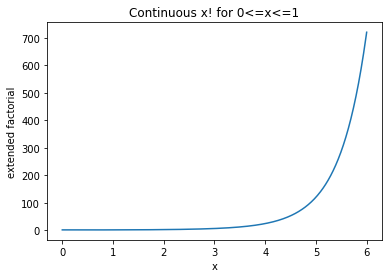

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_axis=np.linspace(0,6,601)
y=[efac(x) for x in x_axis]

plt.plot(x,y)
plt.title('Continuous x! for 0<=x<=1')
plt.xlabel('x')
plt.ylabel('extended factorial')
plt.show


# Fast Fibonacci

There are quicker ways to calculate the $n^{th}$ Fibonacci number than simple recursion.

## Matrix Exponentiation

In [65]:
import numpy as np

# Terrible warning: For some implementation or resource
# reason, this function stops working after n=92. See below.

def fib_mat_exp(n):
  '''Calculates the nth Fibonacci
  number using matrix eponentiation.'''
  f=np.linalg.matrix_power([[1,1],[1,0]],n-1)
  return f[0][0]

In [53]:
fib_mat_exp(17)

1597

In [46]:
# The trouble it seems, is that 
# the matrix exponentiation method eventually
# stops returning the correct answer.
# I suspect it's an issue with resources or the 
# implementation of numpy.linalg.matrix_power.
def lazy_fib(n):
  '''Classic Fibonacci.'''
  a=0;b=1
  for i in range(n-1):
    c=a+b
    a=b
    b=c
  return c

In [47]:
a=np.linalg.matrix_power([[1,1],[1,0]],1000)[0][0]
b=lazy_fib(1000)
a==b

False

In [64]:
test_num=100
a=np.linalg.matrix_power([[1,1],[1,0]],test_num-1)[0][0]
b=lazy_fib(test_num)
print(a,b)
print(len(str(a)),len(str(b)))
print(a==b)
while not a==b:
  a=np.linalg.matrix_power([[1,1],[1,0]],test_num-1)[0][0]
  b=lazy_fib(test_num)
  print(a,b)
  print(len(str(a)),len(str(b)))
  print(a==b,test_num)
  test_num=test_num-1

3736710778780434371 354224848179261915075
19 21
False
3736710778780434371 354224848179261915075
19 21
False 100
-2437933049959450366 218922995834555169026
20 21
False 99
6174643828739884737 135301852344706746049
19 21
False 98
-8612576878699335103 83621143489848422977
20 20
False 97
-3659523366270331776 51680708854858323072
20 20
False 96
-4953053512429003327 31940434634990099905
20 20
False 95
1293530146158671551 19740274219868223167
19 20
False 94
-6246583658587674878 12200160415121876738
20 20
False 93
7540113804746346429 7540113804746346429
19 19
True 92


So the matrix exponentiation method stops returning the correct answer after $n=92$. Darn.

This seems to be an issue with the practicalities of computing this way, i.e., resources or implementation. The theory is sound, and this *should* work for arbitrarily large $n$.

## Fast Doubling

In [110]:
# This dictionary increases the working range of fd_fib()
fib_dict={0:0,1:1}
plist=prime_list(100000)
for i in range(2,plist[-1]+1):
  fib_dict[i]=fib_dict[i-1]+fib_dict[i-2]
for i in range(2,plist[-1]+1):
  if i not in plist:
    fib_dict.pop(i)

In [111]:
def fd_fib(n):
  '''Another Fibonacci algorithm;
  this one uses fast doubling.'''
  if n in fib_dict:
    return fib_dict[n]
  if n==1:
    return 1
  if n%2==0:
    f=fd_fib(n//2)
    return f*(2*fd_fib((n//2)+1)-f)
  else:
    k=(n-1)//2
    return fd_fib(k+1)**2+fd_fib(k)**2

In [102]:
fd_fib(42)

267914296

In [106]:
fd_fib(94)==lazy_fib(94)

True

In [109]:
# length of the last entry in dictionary
len(str(fib_dict[plist[-1]]))

20897

With the dictionary of Fibonacci numbers and simpler calculation, fd_fib() will work for any reasonable input. The length of the dictionary is wayyyy overboard, but then I'll never have to worry. With a too-small dictionary, the function times out because the recursion depth is too great.

In [120]:
print('The 10,000th Fibonacci number is:')
a=fd_fib(10000)
print(a)
print("That's on the order of 10**{}!!".format(len(str(a))))

The 10,000th Fibonacci number is:
336447648764317832666216120051075433103021484606800639065647699746800814421666623681555955136337340255820653326808361593737347904838652682630408924630564318873545443695598274916066020998841839338646527313000888302692356736131351175792974378544137521305205043477016022647583189065278908551543661595829872796829875106312005754287834532155151038708182989697916131278562650331954871402142875326981879620469360978799003509623022910263681314931952756302278376284415403605844025721143349611800230912082870460889239623288354615057765832712525460935911282039252853934346209042452489294039017062338889910858410651831733604374707379085526317643257339937128719375877468974799263058370657428301616374089691784263786242128352581128205163702980893320999057079200643674262023897831114700540749984592503606335609338838319233867830561364353518921332797329081337326426526339897639227234078829281779535805709936910491754708089318410561463223382174656373212482263830921032977016480547262